<a id='top'></a>

<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:150%"><b> Table of contents </b></h1>

 - [**Introduction**](#1)

 - [**Data Overview and Preproccessing**](#2)
 
 - [**feature engineering**](#3)
    
 - [**Modelling and Evaluation**](#4)
    - [**Logistical Classification**](#4_1)
    - [**kNN**](#4_2)
    - [**xgboost**](#4_8)
    - [**LSTM (Keras)**](#4_10)
    
 - [**Evaluate**](#5)

<a id='1'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> Introduction

本作业为FZU HR的企业项目实训

github地址：https://github.com/b1ue0ceanRun/IDS

<a id='2'></a>
# Data Overview and Preproccessing

主要来看一下数据集是否符合要求，数据集官网 https://research.unsw.edu.au/projects/unsw-nb15-dataset

- The total number of records is two million and 540,044 which are stored in the four CSV files, namely, UNSW-NB15_1.csv, UNSW-NB15_2.csv, UNSW-NB15_3.csv and UNSW-NB15_4.csv.
- The ground truth table is named UNSW-NB15_GT.csv and the list of event file is called UNSW-NB15_LIST_EVENTS.csv.
- A partition from this dataset was configured as a training set and testing set, namely, UNSW_NB15_training-set.csv and UNSW_NB15_testing-set.csv respectively. The number of records in the training set is 175,341 records and the testing set is 82,332 records from the different types, attack and normal.

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'

In [2]:
# 看一下数据集数量是否符合要求
import os
import pandas as pd
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_1.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_LIST_EVENTS.csv
/kaggle/input/unsw-nb15/UNSW-NB15_4.csv
/kaggle/input/unsw-nb15/UNSW-NB15_3.csv
/kaggle/input/unsw-nb15/UNSW-NB15_2.csv
/kaggle/input/unsw-nb15/NUSW-NB15_features.csv


训练集 82332 条记录

测试集 175341 条记录

是对的上的

In [3]:
import pandas as pd
# 这里作者搞反了 。。。
train = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv')
test = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [5]:
pd.set_option('display.max_columns', None)
train.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,175341.000000,175341.000000,175341,175341,175341,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341,175341.000000
unique,NaN,NaN,133,13,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,INT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,79946,94168,82275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56000,NaN
mean,87671.000000,1.359389,NaN,NaN,NaN,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,4.953000,6.948010,985.976864,88.216296,4.976254e+03,604.353826,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,NaN,0.680622
std,50616.731112,6.480249,NaN,NaN,NaN,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245841,987.093195,4.496585e+04,4061.043281,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,NaN,0.466237
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,43836.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,87671.000000,0.001582,NaN,NaN,NaN,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,131506.000000,0.668069,NaN,NaN,NaN,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2.513295e+03,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065

In [6]:
train.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


## label

<Axes: xlabel='label'>

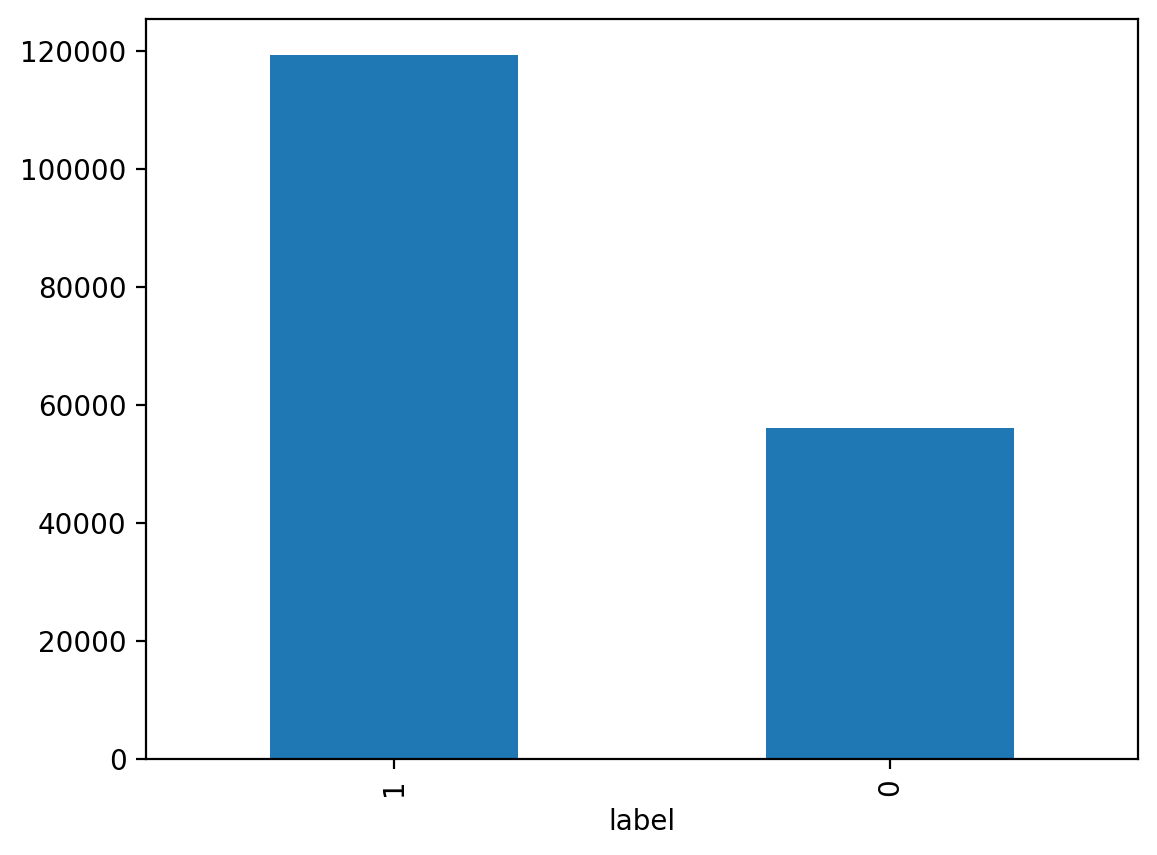

In [7]:
train.label.value_counts().plot.bar()

<Axes: xlabel='label'>

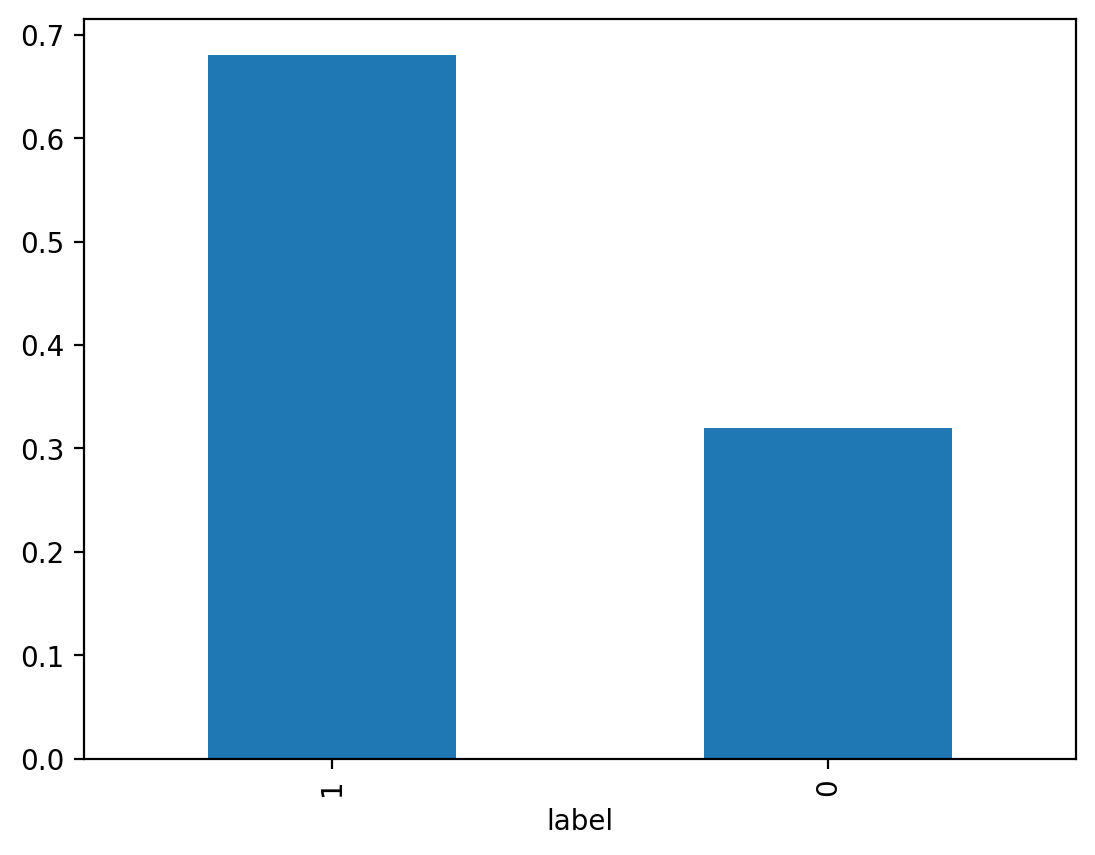

In [8]:
train.label.value_counts(normalize=True).plot.bar()

In [9]:
train.label.value_counts(), train.label.value_counts(normalize=True)

(label
 1    119341
 0     56000
 Name: count, dtype: int64,
 label
 1    0.680622
 0    0.319378
 Name: proportion, dtype: float64)

## attack cat

<Axes: xlabel='attack_cat'>

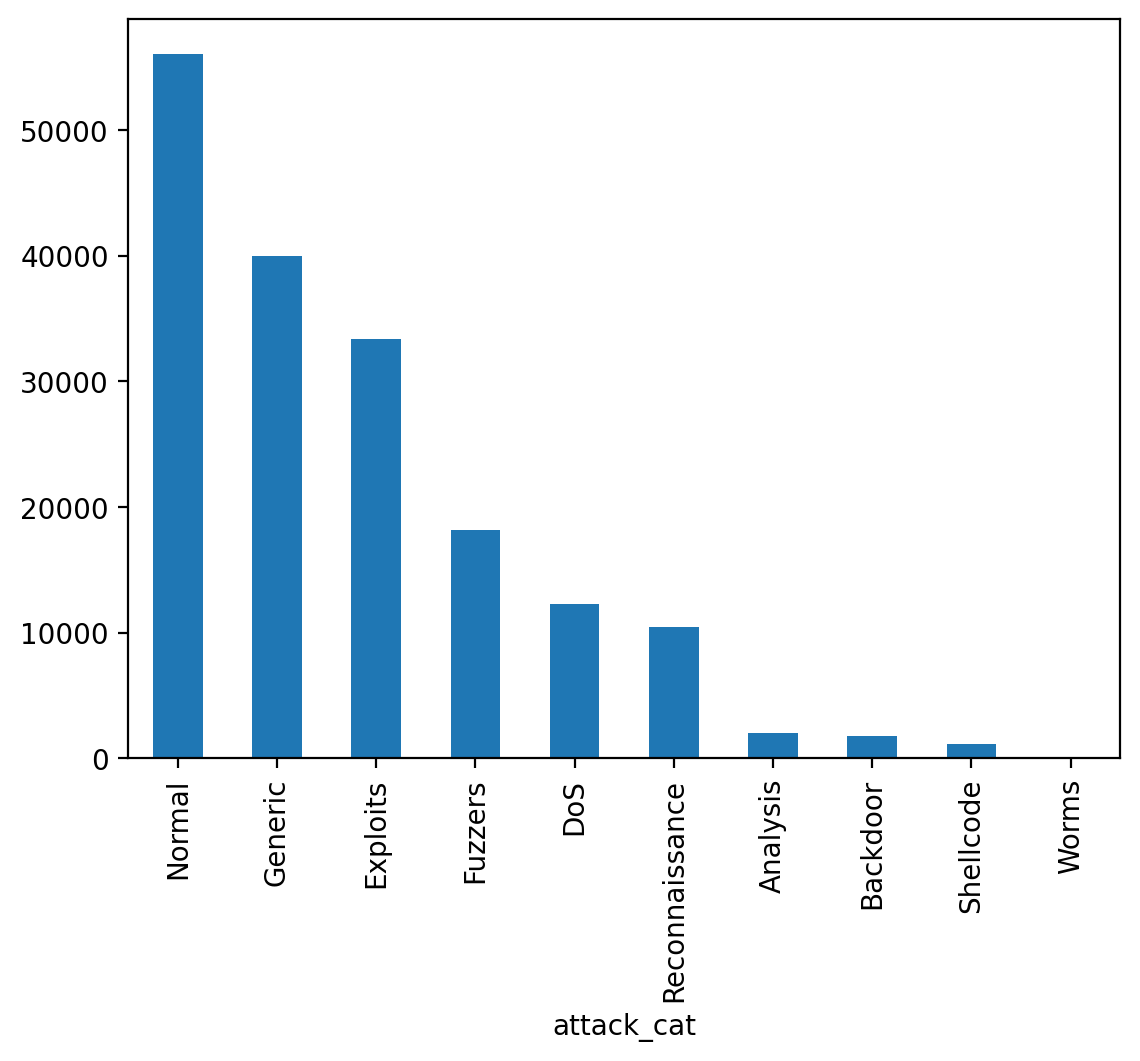

In [10]:
train.attack_cat.value_counts().plot.bar()

## cat features

In [11]:
cat_features = train.columns[train.dtypes == 'object']
cat_features

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

proto 
 {'tcp': 79946, 'udp': 63283, 'unas': 12084, 'arp': 2859, 'ospf': 2595, 'sctp': 1150, 'any': 300, 'gre': 225, 'sun-nd': 201, 'ipv6': 201, 'mobile': 201, 'swipe': 201, 'pim': 201, 'rsvp': 200, 'sep': 193, 'ib': 101, 'mtp': 100, 'skip': 100, 'merit-inp': 100, 'sps': 100, 'ptp': 100, 'fire': 100, 'smp': 100, 'isis': 100, 'pri-enc': 100, 'srp': 100, 'l2tp': 100, 'stp': 100, 'iatp': 100, 'vrrp': 100, 'compaq-peer': 100, 'ddp': 100, 'aris': 100, 'etherip': 100, 'scps': 100, 'qnx': 100, 'idpr': 100, 'larp': 100, 'sccopmce': 100, 'mhrp': 100, 'iplt': 100, 'crudp': 100, 'vines': 100, 'uti': 100, 'secure-vmtp': 100, 'visa': 100, 'ippc': 100, 'ddx': 100, 'tlsp': 100, 'ipip': 100, 'sdrp': 100, 'ipx-n-ip': 100, 'i-nlsp': 100, 'a/n': 100, 'tp++': 100, 'ifmp': 100, 'encap': 100, 'micp': 100, 'ipv6-frag': 100, 'sm': 100, 'aes-sp3-d': 100, 'gmtp': 100, 'eigrp': 100, 'dgp': 100, 'wb-mon': 100, 'cpnx': 100, 'kryptolan': 100, 'wsn': 100, 'bna': 100, 'idrp': 100, 'ipv6-route': 100, 'sprite-rpc': 100

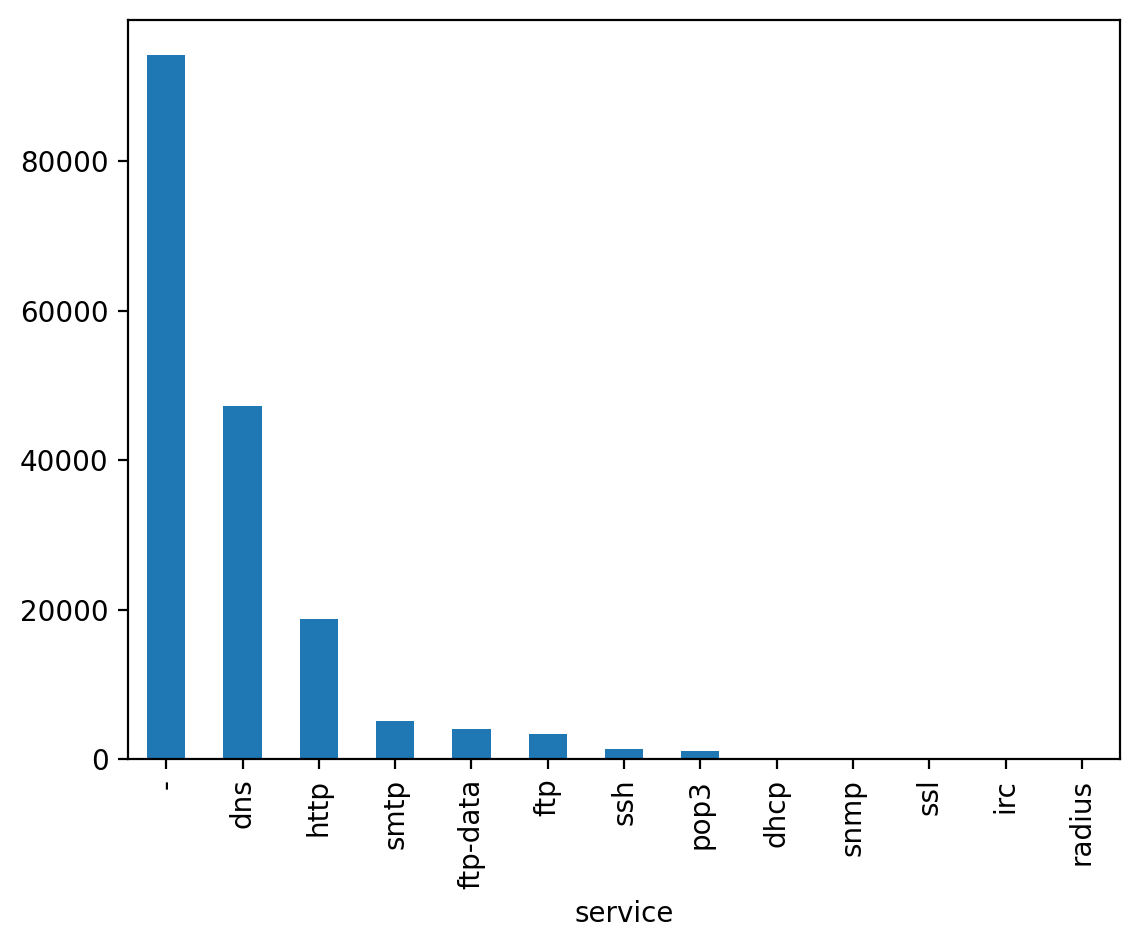

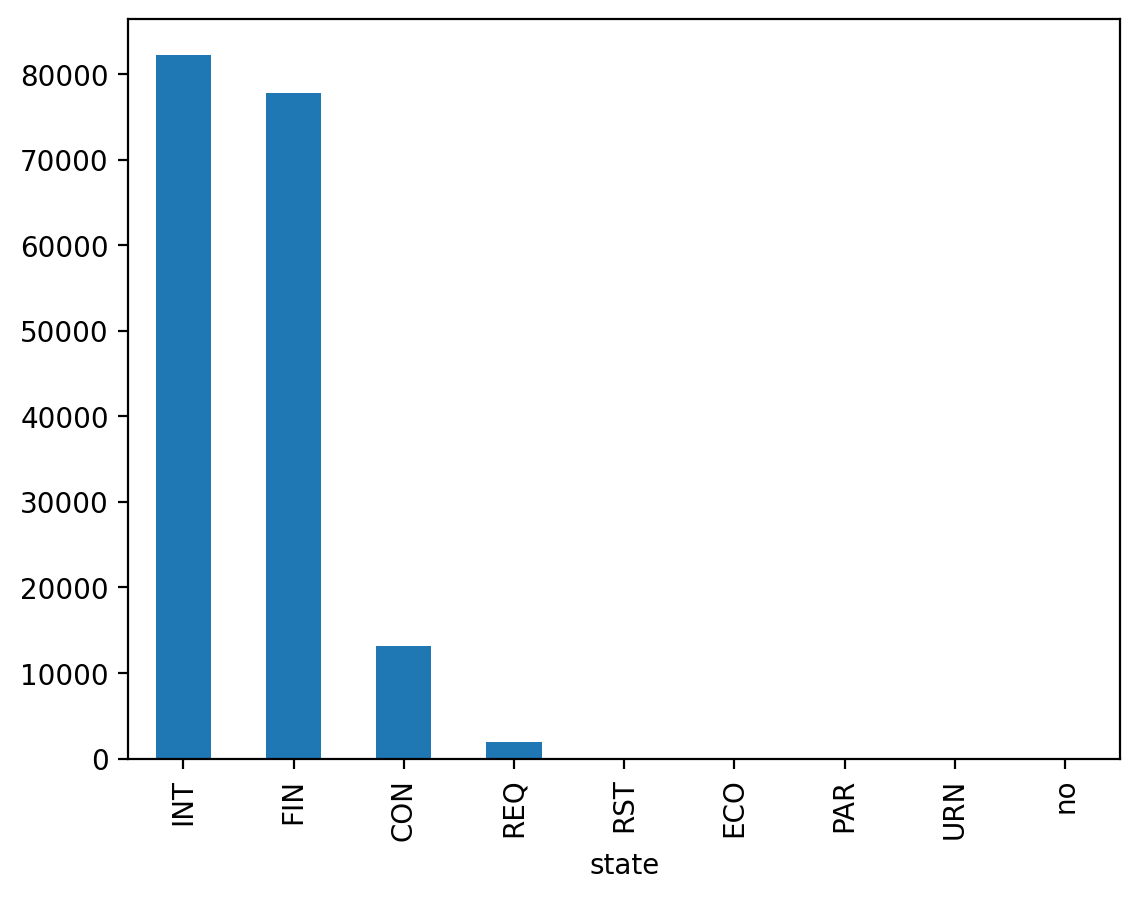

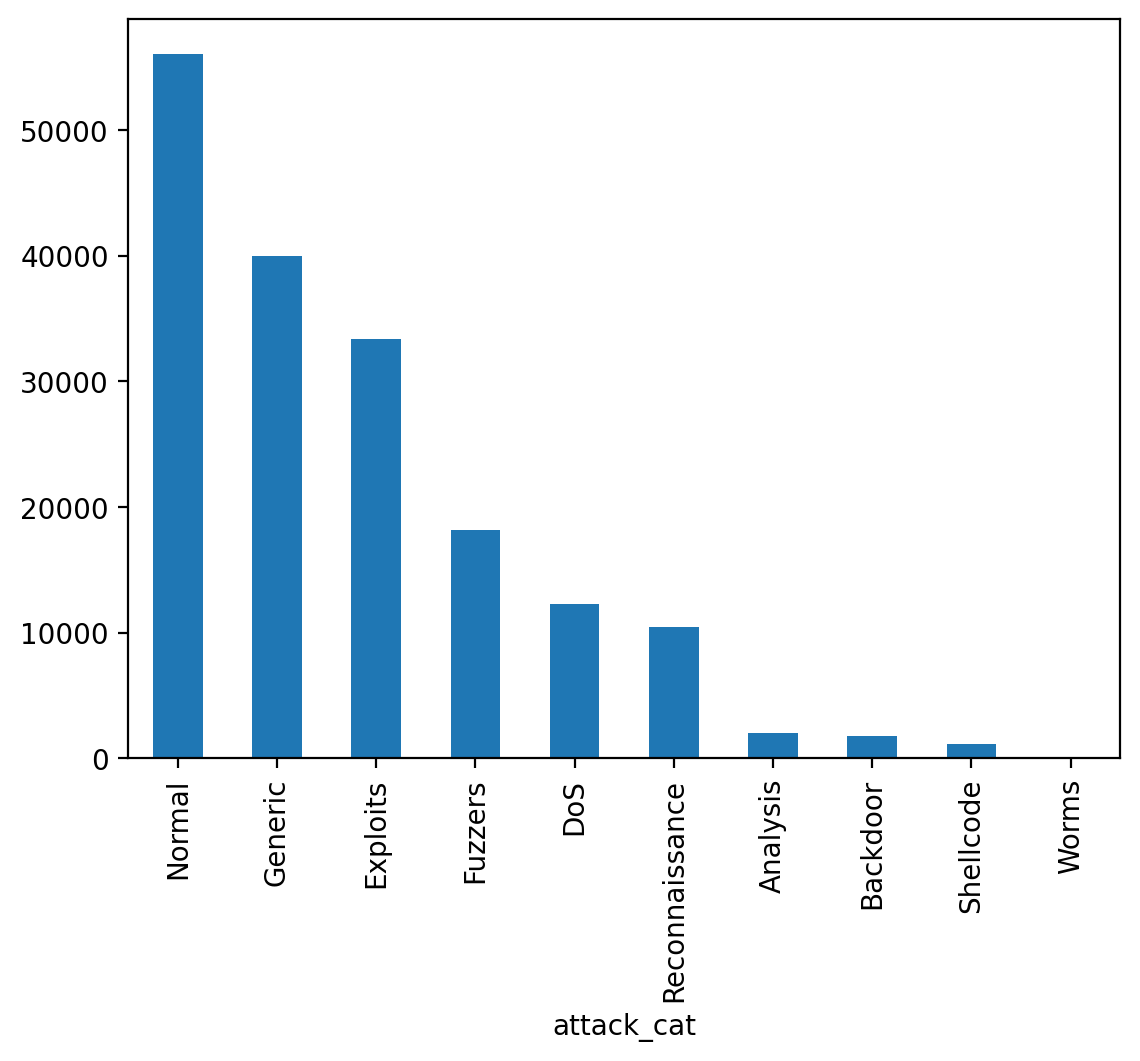

In [12]:
import matplotlib.pyplot as plt

for i in cat_features:
    if i == 'proto':
        print(i, '\n', train[i].value_counts().to_dict())
    else :
        plt.figure()
        train[i].value_counts().plot.bar()

<a id='3'></a>
# feature engineering

特征工程（feature engineering）是指从原始数据中提取特征并将其转换为适合机器学习模型的格式。

这里我们需要从选择合适的特征并且将它们转换。

这里确实是个问题，之前面试也有面试官问过我该如何做特征工程。

先全扔进去试一下

In [13]:
train.label.value_counts(), train.label.value_counts(normalize=True)

(label
 1    119341
 0     56000
 Name: count, dtype: int64,
 label
 1    0.680622
 0    0.319378
 Name: proportion, dtype: float64)

## Drop irrelevant or excess feastures

In [14]:
list_drop = ['id','attack_cat']

从这里开始要把train和test和在一起做预处理

In [15]:
df = pd.concat([train, test], axis=0, ignore_index=True)

In [16]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.700000,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.000000,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0


In [17]:
df.drop(list_drop,axis=1,inplace=True)

## Apply Clamping
防止极端值的出现

In [18]:
import numpy as np
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,4.889317,6.743691,912.300834,98.915462,5.419373e+03,582.251456,121.753661,1.006120e+09,1.002295e+09,119.254629,0.046038,0.023652,0.022386,137.639027,121.649703,0.102242,1.968900e+03,9.383176,1.324978,6.050467,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,65.574953,53.702222,6922.153239,1094.048691,4.903450e+04,3930.153369,127.367443,1.367795e+09,1.363877e+09,127.230477,0.092908,0.053856,0.045771,205.901118,254.041013,0.710593,4.962523e+04,10.829706,0.992300,8.173749,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,6.736370e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,58.094727,56.438859,2.787367e+03,119.712937,255.000000,2.007375e+09,1.992752e+09,255.000000,0.082082,0.036842,0.044665,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,5319.000000,5507.000000,84371.496000,57739.240000,1.483831e+06,463199.240100,255.000000,4.294959e+09,4.294882e+09,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,172.000000,6.558056e+06,63.000000,6.000000,59.000000,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [19]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [20]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,0.456516,12.327372,9.855747,1668.298689,3219.398486,77959.930882,180.000931,84.754957,5.110515e+07,3.477517e+05,2.180974,2.956693,37.158635,30.909571,1759.611714,234.711374,121.753661,9.945511e+08,9.906237e+08,119.254629,0.046038,0.023652,0.022386,123.076155,109.314292,0.098660,9.679225,9.114517,1.324978,5.658528,4.861627,3.879448,8.051511,0.012819,0.012850,0.098652,6.382822,8.857366,0.014274,0.639077
std,0.759088,16.861516,16.471114,3197.276145,8361.316057,106754.703097,102.488268,112.762131,7.666502e+07,9.740522e+05,3.265256,6.008834,61.852646,50.163202,2852.886830,651.083756,127.367443,1.342271e+09,1.338062e+09,127.230477,0.092908,0.053856,0.045771,145.047115,207.972476,0.298205,37.080850,10.058965,0.992300,6.866560,6.864614,5.367192,10.333915,0.116091,0.116421,0.298195,7.084512,10.116552,0.118618,0.480269
min,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,114.000000,0.000000,30.789277,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,528.000000,178.000000,2955.664893,254.000000,29.000000,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,0.673637,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1362.000000,1064.000000,125000.000300,254.000000,252.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,58.094727,56.438859,2787.367296,119.712937,255.000000,2.007375e+09,1.992752e+09,255.000000,0.082082,0.036842,0.044665,100.000000,89.000000,0.000000,0.000000,12.000000,2.000000,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,2.811414,62.000000,62.000000,13454.000000,33044.000000,333333.321500,255.000000,254.000000,2.666667e+08,3.965441e+06,12.000000,24.000000,228.630005,162.880112,9528.481192,2776.853236,255.000000,3.835956e+09,3.829021e+09,255.000000,3.821465,3.226788,2.928778,638.000000,769.400000,1.000000,159.000000,34.000000,6.000000,25.000000,25.000000,17.000000,34.000000,4.000000,4.000000,1.000000,25.000000,34.000000,1.000000,1.000000


对几乎所有的数值应用对数函数，因为它们大多数都呈右偏分布。

逐个应用对数函数将会非常繁琐，因此设立了一个简单的规则：如果连续特征中的唯一值数量超过50，则应用对数函数。寻找超过50个唯一值的原因是为了滤除更倾向于分类行为的基于整数的特征。

In [21]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

减少分类特征中的标签数

一些特征具有非常高的基数，因此此部分将基数减少到每个特征的5或6个。其逻辑是将特征中出现最频繁的前5个标签作为标签，将其余标签设置为“-”（很少使用的）标签。在稍后进行编码时，维度将不会爆炸，从而避免维度灾难。

In [22]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,257673,257673,257673
unique,133,13,11
top,tcp,-,FIN
freq,123041,141321,117164


In [23]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')
    
    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [24]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,257673,257673,257673
unique,6,5,6
top,tcp,-,FIN
freq,123041,149701,117164


In [25]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object', name='proto')

In [26]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object', name='proto')

`chi2`, 或称卡方检验（Chi-squared test），是一种统计方法，用于检验两个（分类的）变量之间是否存在显著关联。在特征选择上，尤其是在分类问题中，它被用来评估一个特征和响应变量之间的相关性。

### 原理

卡方检验的基本原理是比较观察值和期望值之间的差异。在特征选择的上下文中，这意味着：

- **观察值**：在给定的特征和目标类别组合中实际观察到的频率。
- **期望值**：如果特征和目标类别相互独立，则预期观察到的频率。

### 计算步骤

1. **建立频率表**：对于每个特征，创建一个频率表，表中包含了每个类别下该特征的实际观察频率。

2. **计算期望频率**：基于特征和目标类别的总频率，计算在独立假设下的期望频率。

3. **计算卡方统计量**：对每个类别，计算观察频率和期望频率之差的平方，除以期望频率，然后对所有类别求和。公式如下：

   \[ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} \]

   其中，\(O_i\) 是观察频率，\(E_i\) 是期望频率。

4. **评估显著性**：卡方统计量越大，意味着观察值和期望值之间的差异越大，从而表示特征和目标类别之间可能存在较强的关联。

### 应用

在特征选择中，使用卡方检验可以帮助识别对预测目标类别最有用的特征。一个高卡方分数的特征可能意味着该特征和目标类别之间有较强的关联，因此可能对建立模型非常有用。

### 注意事项

- 卡方检验只适用于分类数据。
- 它要求每个类别的频率不要太小，否则检验结果可能不准确。
- 卡方检验假设样本是随机抽样的，观测之间相互独立。

In [27]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,4:-2]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()

## one-hot编码

In [28]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [29]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(257673, 42)

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [31]:
np.shape(X)

(257673, 56)

In [32]:
df_cat.describe(include='all')

,proto,service,state
count,257673,257673,257673
unique,6,5,6
top,tcp,-,FIN
freq,123041,149701,117164


In [33]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14647458e-01, 1.79175947e+00, 1.60943791e+00,
       5.55295958e+00, 5.15329159e+00, 4.31865397e+00, 2.52000000e+02,
       2.54000000e+02, 9.55817230e+00, 9.04739373e+00, 0.00000000e+00,
       0.00000000e+00, 3.23063047e+00, 2.23804657e+00, 3.43969819e+00,
       2.55183325e+00, 2.55000000e+02, 2.02480851e+01, 2.15128742e+01,
       2.55000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.76120012e+00, 3.78418963e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00])

In [34]:
len(feature_names)

42

In [35]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [36]:
len(feature_names)

56

<a id='4'></a>
# Modelling and Evaluation





In [37]:
# 重新把数据集拆分成train&test
X_train = X[:len(train)]
X_test = X[len(train):]
y_train = y[:len(train)]
y_test = y[len(train):]

In [38]:
np.shape(X_test)

(82332, 56)

对连续特征使用标准缩放器，将它们统一到相同的尺度顺序中。

In [39]:
df_cat.describe(include='all')

,proto,service,state
count,257673,257673,257673
unique,6,5,6
top,tcp,-,FIN
freq,123041,149701,117164


In [40]:
# 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

In [41]:
type(y_test)

pandas.core.series.Series

## 逻辑回归

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from time import time
from tqdm import tqdm

# Assuming X_train, X_test, y_train, y_test are numpy arrays already provided and preprocessed

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.astype(np.float32))
X_test_tensor = torch.tensor(X_test.astype(np.float32))
y_train_tensor = torch.tensor(y_train.to_numpy().astype(np.float32))
y_test_tensor = torch.tensor(y_test.to_numpy().astype(np.float32))

# Create TensorDatasets and DataLoaders
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, num_features):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(num_features, 1)
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

# Initialize the model
model = LogisticRegressionModel(X_train.shape[1])

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
def train_model(model, train_loader, criterion, optimizer):
    model.train()
    start_time = time()
    for epoch in tqdm(range(100)):  # Loop over the dataset multiple times
        for i, (inputs, labels) in enumerate(train_loader):
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels.view(-1, 1))
            loss.backward()
            optimizer.step()
    end_time = time()
    return end_time - start_time

# Function to predict and calculate metrics
def evaluate_model(model, test_loader):
    model.eval()
    y_pred = []
    y_true = []
    start_time = time()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            y_pred.extend(outputs.data.numpy().flatten())
            y_true.extend(labels.numpy().flatten())
    end_time = time()
    predict_time = end_time - start_time
    return y_true, y_pred, predict_time

# Train the model and record the time
train_time = train_model(model, train_loader, criterion, optimizer)

# Evaluate the model
y_true, y_pred, predict_time = evaluate_model(model, test_loader)

# Convert probabilities to binary predictions
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
precision = precision_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)
total_time = train_time + predict_time

# Create a DataFrame for performance metrics
# model_performance = pd.DataFrame({
#     'Accuracy': [accuracy],
#     'Recall': [recall],
#     'Precision': [precision],
#     'F1-Score': [f1],
#     'time to train': [train_time],
#     'time to predict': [predict_time],
#     'total time': [total_time]
# })



100%|██████████| 100/100 [02:36<00:00,  1.57s/it]


In [43]:
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1,train_time,predict_time,total_time]

## xgboost

- max_depth（最大深度）: 控制树的深度，较深的树可以捕捉更复杂的模式，但也更容易过拟合。对于复杂的数据集，可以尝试增加这个值。
- min_child_weight（最小子样本权重）: 定义一个节点分裂所需的最小样本权重和。较高的值可以防止模型过于复杂，从而避免过拟合。
- eta（学习率）: 用于控制每一步的更新幅度，较小的值可以使训练过程更稳定。
- subsample（子样本比率）: 用于控制每棵树随机采样的比例，可以防止过拟合。
- colsample_bytree（列采样）: 用于控制每棵树随机采样的特征比例。
- n_estimators（估计器数量）: 树的数量。更多的树可以增加模型的复杂度，但也可能导致过拟合。
- scale_pos_weight（正负样本的权重比）: 用于处理不平衡数据集。

In [44]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
from time import time

# 假设 X_train, X_test, y_train, y_test 已经是预处理好的 numpy 数组

# 创建 XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 设置 XGBoost 参数
# params = {
#     'objective': 'binary:logistic',  # 二分类目标
#     'max_depth': 3,                  # 决策树的最大深度
#     'eta': 0.1,                      # 学习率
#     'verbosity': 0                   # 日志级别（0表示不输出信息）
# }
params = {
    'objective': 'binary:logistic',
    'max_depth': 8,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100,
    'scale_pos_weight': 1,
    'verbosity': 0
}
num_round = 500  # 训练轮数

# 训练模型
start_train = time()
bst = xgb.train(params, dtrain, num_round)
train_time = time() - start_train

# 预测
start_predict = time()
y_pred_prob = bst.predict(dtest)
predict_time = time() - start_predict

# 将概率转换为二元预测
y_pred = [1 if x > 0.5 else 0 for x in y_pred_prob]

# 计算指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 总时间
total_time = train_time + predict_time

# # 将指标存储到 DataFrame
# model_performance = pd.DataFrame({
#     'Accuracy': [accuracy],
#     'Recall': [recall],
#     'Precision': [precision],
#     'F1-Score': [f1],
#     'Time to Train': [train_time],
#     'Time to Predict': [predict_time],
#     'Total Time': [total_time]
# })

model_performance.loc['XGBOOST'] = [accuracy, recall, precision, f1,train_time,predict_time,total_time]

## KNN

In [45]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from time import time

# Assuming X_train, X_test, y_train, y_test are numpy arrays already provided and preprocessed

# 创建 KNN 模型实例
knn = KNeighborsClassifier(n_neighbors=5)  # 可以调整 n_neighbors 的值

# Function to train and evaluate the model
def train_and_evaluate_knn(knn, X_train, y_train, X_test, y_test):
    start_train_time = time()
    knn.fit(X_train, y_train)  # 训练 KNN 模型
    end_train_time = time()
    train_time = end_train_time - start_train_time

    start_predict_time = time()
    y_pred = knn.predict(X_test)  # 使用模型进行预测
    end_predict_time = time()
    predict_time = end_predict_time - start_predict_time

    # 计算性能指标
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    total_time = train_time + predict_time
    model_performance.loc['KNN'] = [accuracy, recall, precision, f1,train_time,predict_time,total_time]

    # 创建性能指标的 DataFrame
    performance = pd.DataFrame({
        'Accuracy': [accuracy],
        'Recall': [recall],
        'Precision': [precision],
        'F1-Score': [f1],
        'time to train': [train_time],
        'time to predict': [predict_time],
        'total time': [total_time]
    })

    return performance

# 使用模型并获取性能指标
train_and_evaluate_knn(knn, X_train, y_train, X_test, y_test)

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
0,0.860103,0.964462,0.815264,0.88361,0.011527,33.925332,33.936858


## LSTM

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from time import time

# 定义 LSTM 模型
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(56, 20, batch_first=True)
        self.lstm2 = nn.LSTM(20, 20, batch_first=True)
        self.dense = nn.Linear(20, 2)  # 两个输出类别

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = x[:, -1, :]  # 取最后一个时间步的输出
        x = self.dense(x)
        return x

# 假设 X_train, X_test, y_train, y_test 是已经定义好的 NumPy 数组

# 重塑数据以符合 LSTM 的输入要求：(样本数, 时间步数, 特征数)
X_train_tensor = torch.tensor(X_train.reshape(X_train.shape[0], 1, 56).astype(np.float32))
X_test_tensor = torch.tensor(X_test.reshape(X_test.shape[0], 1, 56).astype(np.float32))
y_train_tensor = torch.tensor(y_train.to_numpy().astype(np.int64))
y_test_tensor = torch.tensor(y_test.to_numpy().astype(np.int64))

# 创建 DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=2000, shuffle=False)
test_loader = DataLoader(test_data, batch_size=2000, shuffle=False)

# 初始化模型
model = LSTMModel()

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 适用于二类分类问题
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型的函数
def train_model(model, train_loader, criterion, optimizer, epochs):
    model.train()
    start_time = time()
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    end_time = time()
    print(f"训练时间：{end_time - start_time}秒")

# 训练模型&评分
# Function to evaluate the model and calculate metrics
def evaluate_model(model, test_loader):
    model.eval()
    y_pred = []
    y_true = []
    start_time = time()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            y_pred.extend(predicted.numpy())
            y_true.extend(labels.numpy())
    end_time = time()
    predict_time = end_time - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1, predict_time

# Train the model and record the time
start_train = time()
train_model(model, train_loader, criterion, optimizer, epochs=200)
end_train = time()
train_time = end_train - start_train

# Evaluate the model
accuracy, precision, recall, f1, predict_time = evaluate_model(model, test_loader)

# Calculate total time
total_time = train_time + predict_time

# 创建性能指标的 DataFrame
# performance = pd.DataFrame({
#     'Accuracy': [accuracy],
#     'Recall': [recall],
#     'Precision': [precision],
#     'F1-Score': [f1],
#     'time to train': [train_time],
#     'time to predict': [predict_time],
#     'total time': [total_time]
# })

model_performance.loc['LSTM'] = [accuracy, recall, precision, f1,train_time,predict_time,total_time]

训练时间：389.52826404571533秒


<a id='5'></a>
# Evaluate

In [47]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'precision': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
Logistic,81.02%,99.46%,0.745650,85.23%,156.6,0.5,157.1
XGBOOST,86.79%,97.49%,0.819412,89.04%,31.6,0.6,32.2
KNN,86.01%,96.45%,0.815264,88.36%,0.0,33.9,33.9
LSTM,82.42%,99.08%,0.761624,86.12%,389.5,0.8,390.4
